# Getting Started with Tensorflow

Tensorflow is a framework for defining and running computational graphs. It's primarily used for deep learning although it can also be used for other numerical computing and machine learning tasks.  

In [1]:
import tensorflow as tf

## Tensorflow Graphs and Sessions

Tensorflow uses computational graphs to run it's functions and models. Graphs are defined by their operations and variables.

Sessions are used to run the a graph. They create the connection between the python program and the C++ TF runtime. Setting up the graph, variables and operations can be done outside the session. But, nothing will be run until it's connected to the session and we evaluate the expression that we created.

In [2]:
# set up two variables
x = tf.Variable(32, name='x')
y = tf.Variable(45, name='y')

# set up some expression to perform on these variables
f = x*y + y*x*y

with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()
    print('Tensorflow Output:', result)
    
print('Python Output:', 32*45 + 45*32*45)

Tensorflow Output: 66240
Python Output: 66240


# Exercise: 

Use placeholders to create a system that can add any two numbers. Since we will primarily be doing machine learning with TensorFlow we don't necessarily want the data in our graph at the start. We want to have buckets that we can put data into and get some result. Set up the same system as above except this time using placeholders so that we can pass values into it.

### Answer 

In [3]:
x = tf.placeholder(tf.int32, shape=(1,), name='x_phldr')
y = tf.placeholder(tf.int32, shape=(1,), name='y_phldr')
z = x*y + y*x*y

with tf.Session() as sess:
    result = sess.run(z, feed_dict={x:[32], y:[45]})
    
print(result)

[66240]


## Basic Linear Regression in Tensorflow

Running a basic linear regression in Tensorflow with built in optimizers and gradient descent algorithms.

In [4]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

def normalize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std

Import the california housing dataset, view the shapes.

In [5]:
housing = fetch_california_housing()

# load the data into numpy arrays
housing_features = housing.data
housing_targets = housing.target

n, f_dim = housing_features.shape

# normalize the features
housing_features= normalize(housing_features)

# add bias
housing_features = np.c_[np.ones((n, 1)), housing_features]

housing_features = housing_features[housing_targets < 5]
housing_targets = housing_targets[housing_targets < 5]

# reshape targets to TF expectation
housing_targets = np.expand_dims(housing_targets, 1)

X_train, X_test, y_train, y_test = train_test_split(housing_features,
                                                    housing_targets,
                                                    test_size=0.1)

print(housing.feature_names)
print(X_train.shape)
print(y_train.shape)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(17683, 9)
(17683, 1)


In [6]:
LR = 0.005
EPOCHS = 5000
# save all of the losses
losses = []

X = tf.placeholder(tf.float32, shape=(None, f_dim+1), name='X')
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')
W = tf.Variable(tf.ones([f_dim+1, 1]))

# after launching a session, run the initializer to initialize all of
# the variables in the graph
init = tf.global_variables_initializer()

# set up operation to get the output from the regression, 
# dot product of weight  and features
y_pred = tf.matmul(X, W)

# calculate the mean squared error
error = y_pred - y
loss = tf.reduce_mean(tf.square(error), name='mse')

# use TF's built in autograd features to run gradient descent
train_step = tf.train.GradientDescentOptimizer(LR).minimize(loss)

In [7]:
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    for e in range(EPOCHS):
        if e % 100 == 0:
            print("Epoch:", e, 
                  "Current loss:", 
                  sess.run(loss, feed_dict={X: X_train, y: y_train}), 
                  "Test loss:",
                 sess.run(loss, feed_dict={X: X_test, y: y_test}))
            
        sess.run(train_step, feed_dict={X: X_train, y: y_train})
        losses.append(sess.run(loss, feed_dict={X: X_train, y: y_train}))
        
    best_weights = W.eval()
    save_path = saver.save(sess, '/tmp/linear_regression.ckpt')

Epoch: 0 Current loss: 7.61533 Test loss: 4.51717
Epoch: 100 Current loss: 1.44861 Test loss: 1.17409
Epoch: 200 Current loss: 0.853819 Test loss: 0.78038
Epoch: 300 Current loss: 0.726148 Test loss: 0.678566
Epoch: 400 Current loss: 0.670546 Test loss: 0.629114
Epoch: 500 Current loss: 0.632916 Test loss: 0.593122
Epoch: 600 Current loss: 0.602731 Test loss: 0.562983
Epoch: 700 Current loss: 0.577233 Test loss: 0.536929
Epoch: 800 Current loss: 0.555357 Test loss: 0.514303
Epoch: 900 Current loss: 0.536489 Test loss: 0.494669
Epoch: 1000 Current loss: 0.520178 Test loss: 0.477647
Epoch: 1100 Current loss: 0.506055 Test loss: 0.462898
Epoch: 1200 Current loss: 0.493811 Test loss: 0.450119
Epoch: 1300 Current loss: 0.483181 Test loss: 0.439043
Epoch: 1400 Current loss: 0.473942 Test loss: 0.429439
Epoch: 1500 Current loss: 0.465899 Test loss: 0.421106
Epoch: 1600 Current loss: 0.458888 Test loss: 0.41387
Epoch: 1700 Current loss: 0.452769 Test loss: 0.407584
Epoch: 1800 Current loss: 0.

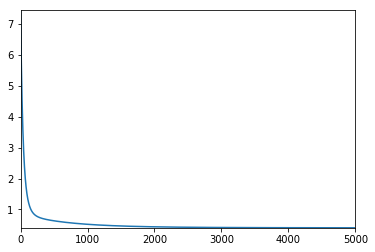

In [8]:
plt.plot(range(len(losses)),np.array(losses))
plt.axis([0,EPOCHS,np.min(losses),np.max(losses)])
plt.show()

# Exercise

### Making predictions on our test data

Now that we have our trained model, we can load it up and make predictions on our test set. Load the model from the stored state, and run the prediction function with a TensorFlow Session on the testing data.

In [9]:
# best weight values are saved in the checkpoint
with tf.Session() as sess:
    saver.restore(sess, '/tmp/linear_regression.ckpt')
    # fill in the rest below

INFO:tensorflow:Restoring parameters from /tmp/linear_regression.ckpt


### Answer

In [10]:
# best weight values are saved in the checkpoint
with tf.Session() as sess:
    saver.restore(sess, '/tmp/linear_regression.ckpt')
    preds = sess.run(y_pred, feed_dict={X: X_test})
    print(sess.run(loss, feed_dict={X: X_test, y: y_test}))

INFO:tensorflow:Restoring parameters from /tmp/linear_regression.ckpt
0.365453


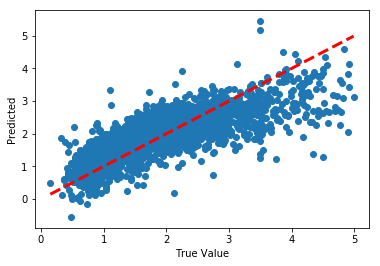

In [11]:
fig, ax = plt.subplots()
ax.scatter(y_test, preds)
ax.plot([y_test.min(), y_test.max()], 
        [y_test.min(), y_test.max()], '--', lw=3, color='r')
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted')
plt.show()